In [1]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [2]:
import nltk
import pymongo
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import classifier
import postprocessing

In [3]:
db = client.local
testData = db.testTweets

In [4]:
'''
All of the data collected during the 6 weeks of data 
collection can be viewed in the testTweest.csv file.
'''

with open('testTweets.csv', 'wb') as outFile:
    writer = csv.writer(outFile)
    writer.writerow(['id_str', 'country', 'place_type', 'full_name', 'name', 'created_at', 'text', 'sentiment'])
    for tweet in testData.find():
        writer.writerow([tweet['id_str'].encode('utf-8'),
                         tweet['country'].encode('utf-8'),
                         tweet['place_type'].encode('utf-8'),
                         tweet['full_name'].encode('utf-8'),
                         tweet['name'].encode('utf-8'),
                         postprocessing.convert_to_datetime(tweet['created_at']),
                         tweet['text'].encode('ascii', 'ignore').decode('ascii'),
                         classifier.classify(tweet['processed_words']).encode('utf-8'),
                        ])

In [5]:
'''
Now, store the data in clusters where the 
place type is 'city'

Save the date at which the tweet was created,
which city the tweet was tweeted from, and 
what the sentiment of that tweet was
'''

tweets = pd.read_csv('testTweets.csv', header='infer')
for index, tweet in tweets.iterrows():
    if tweet['place_type'] == 'city':
        db.aggregateTweets.insert_one(
            {
                'created_at': tweet['created_at'],
                'city': tweet['name'],
                'sentiment': tweet['sentiment']
            }
        )

# Most Common Place Type in Test Data

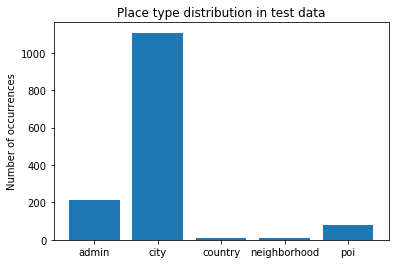

In [6]:
place_types = []
for tweet in testData.find():
    place_types.append(tweet['place_type'])
place_types = nltk.FreqDist(place_types)

places = []
frequencies = []
for place in place_types.items():
    places.append(place[0])
    frequencies.append(place[1])

x = np.arange(len(places))
y = frequencies

plt.bar(x, y)
plt.xticks(x, places)
plt.ylabel('Number of occurrences')
plt.title('Place type distribution in test data')

# Most Common Cities in Aggregated Data

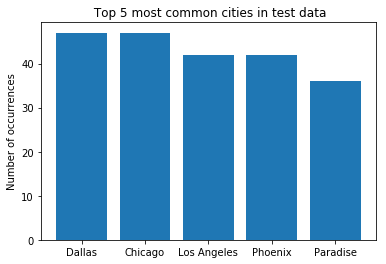

In [7]:
cities = []
for tweet in db.aggregateTweets.find():
    cities.append(tweet['city'])
cities = nltk.FreqDist(cities)
    
names = []
frequencies = []
cities = cities.most_common(5)
for name in cities:
    names.append(name[0])
    frequencies.append(name[1])

x = np.arange(len(names))
y = frequencies

plt.bar(x, y)
plt.xticks(x, names)
plt.ylabel('Number of occurrences')
plt.title(' Top 5 most common cities in test data')

In [8]:
'''
Create a set of the unique dates in which 
data was collected during the 6 weeks. This
will be used to aggregate the tweets for 
each region per day.
'''

dates = set()
for cluster in db.aggregateTweets.find():
    dates.add(cluster['created_at'])
dates = sorted(dates)

# Southwest Airlines Twitter Sentiment in Dallas

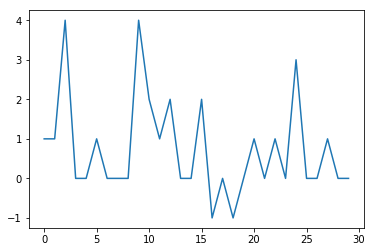

In [9]:
'''
Calculate the net sentiment per day in Dallas. 

If the sentiment in a particular tweet is 
positive, add 1 to the count. Similarly, if 
the sentiment in a particular tweet is
negative, decrease the count by 1.
'''

dallas = {}
dallas = dallas.fromkeys(list(dates), 0)
for cluster in db.aggregateTweets.find():
    if cluster['city'] == 'Dallas':
        if cluster['sentiment'] == 'positive':
            dallas[cluster['created_at']] = dallas[cluster['created_at']] + 1
        elif cluster['sentiment'] == 'negative':
            dallas[cluster['created_at']] = dallas[cluster['created_at']] - 1
            
x = np.arange(len(dallas.keys()))
y = dallas.values()

plt.plot(x,y)

# Southwest Airlines Twitter Sentiment in Chicago

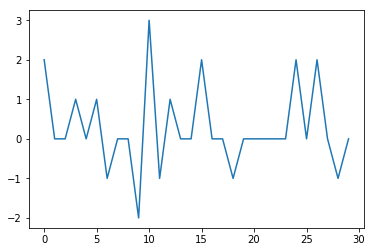

In [10]:
'''
Calculate the net sentiment per day in Chicago. 

If the sentiment in a particular tweet is 
positive, add 1 to the count. Similarly, if 
the sentiment in a particular tweet is
negative, decrease the count by 1.
'''

chicago = {}
chicago = chicago.fromkeys(list(dates), 0)
for cluster in db.aggregateTweets.find():
    if cluster['city'] == 'Chicago':
        if cluster['sentiment'] == 'positive':
            chicago[cluster['created_at']] = chicago[cluster['created_at']] + 1
        elif cluster['sentiment'] == 'negative':
            chicago[cluster['created_at']] = chicago[cluster['created_at']] - 1
            
x = np.arange(len(chicago.keys()))
y = chicago.values()

plt.plot(x,y)

# Southwest Airlines Twitter Sentiment in Los Angeles

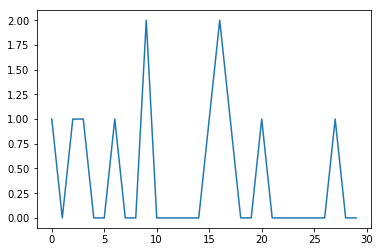

In [11]:
'''
Calculate the net sentiment per day in Los Angeles. 

If the sentiment in a particular tweet is 
positive, add 1 to the count. Similarly, if 
the sentiment in a particular tweet is
negative, decrease the count by 1.
'''

losAngeles = {}
losAngeles = losAngeles.fromkeys(list(dates), 0)
for cluster in db.aggregateTweets.find():
    if cluster['city'] == 'Los Angeles':
        if cluster['sentiment'] == 'positive':
            losAngeles[cluster['created_at']] = losAngeles[cluster['created_at']] + 1
        elif cluster['sentiment'] == 'negative':
            losAngeles[cluster['created_at']] = losAngeles[cluster['created_at']] - 1
            
x = np.arange(len(losAngeles.keys()))
y = losAngeles.values()

plt.plot(x,y)

# Southwest Airlines Twitter Sentiment in Phoenix

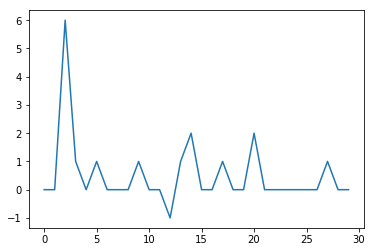

In [12]:
'''
Calculate the net sentiment per day in Phoenix. 

If the sentiment in a particular tweet is 
positive, add 1 to the count. Similarly, if 
the sentiment in a particular tweet is
negative, decrease the count by 1.
'''

phoenix = {}
phoenix = phoenix.fromkeys(list(dates), 0)
for cluster in db.aggregateTweets.find():
    if cluster['city'] == 'Phoenix':
        if cluster['sentiment'] == 'positive':
            phoenix[cluster['created_at']] = phoenix[cluster['created_at']] + 1
        elif cluster['sentiment'] == 'negative':
            phoenix[cluster['created_at']] = phoenix[cluster['created_at']] - 1
            
x = np.arange(len(phoenix.keys()))
y = phoenix.values()

plt.plot(x,y)

# Southwest Airlines Twitter Sentiment in Paradise

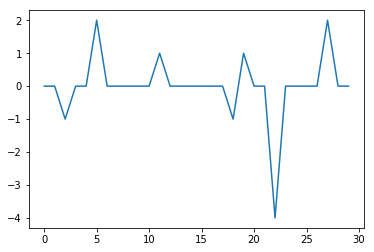

In [13]:
'''
Calculate the net sentiment per day in Paradise. 

If the sentiment in a particular tweet is 
positive, add 1 to the count. Similarly, if 
the sentiment in a particular tweet is
negative, decrease the count by 1.
'''

paradise = {}
paradise = paradise.fromkeys(list(dates), 0)
for cluster in db.aggregateTweets.find():
    if cluster['city'] == 'Paradise':
        if cluster['sentiment'] == 'positive':
            paradise[cluster['created_at']] = paradise[cluster['created_at']] + 1
        elif cluster['sentiment'] == 'negative':
            paradise[cluster['created_at']] = paradise[cluster['created_at']] - 1
            
x = np.arange(len(paradise.keys()))
y = paradise.values()

plt.plot(x,y)